In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [3]:
temp_df     =pd.read_csv("Resources/CA avg temps 2000-2020.csv")
precip_df   =pd.read_csv("Resources/CA total precip 2000-2020.csv")
beefprod_df = pd.read_csv( "Resources/beef production 2000-2020.csv")


In [4]:
#clean beef dataframe


beefprod_df["beef production in LB"]=beefprod_df["beef production in LB"].str.replace(",","").astype(float)/1000000000
beefprod_df["beef production in LB"]=round(beefprod_df["beef production in LB"],2)
beefprod_df["Year"]=beefprod_df["Year"].astype(str)
beefprod_df=beefprod_df.rename(columns={"beef production in LB":"beef prod in billion LB"})



In [5]:
beefprod_df

,Year,beef prod in billion LB
0,2000,1.92
1,2001,1.99
2,2002,1.83
3,2003,1.99
4,2004,1.98
5,2005,1.93
6,2006,1.99
7,2007,1.98
8,2008,2.00
9,2009,1.90


Text(0, 0.5, 'Beef production in LB')

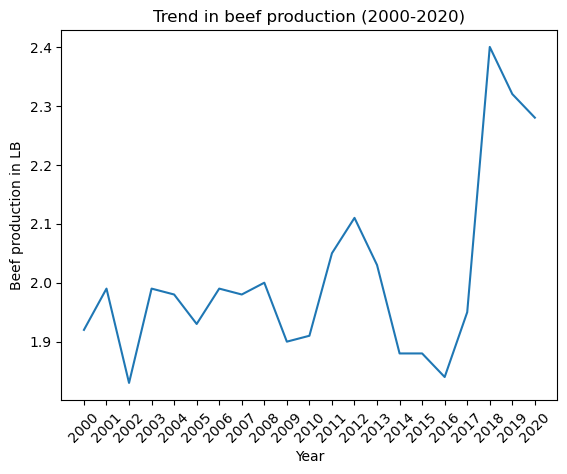

In [6]:
#trend in beef production 
x_values=beefprod_df["Year"]
y_values=beefprod_df["beef prod in billion LB"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title("Trend in beef production (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef production in LB")

rvalue:-0.12


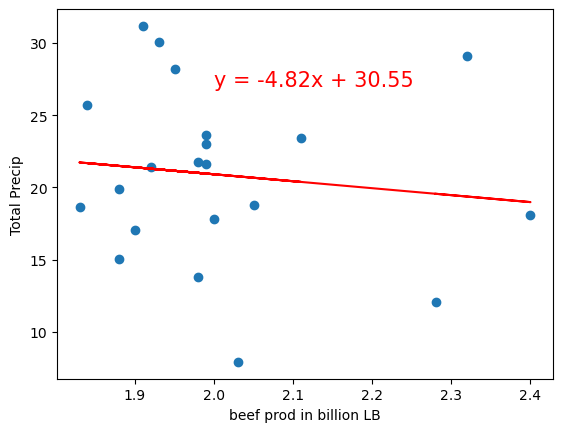

In [16]:
#Scatter plot

x_values =beefprod_df["beef prod in billion LB"]
y_values = precip_df ["Total Precip"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,27),fontsize=15,color="red")
plt.xlabel("beef prod in billion LB")
plt.ylabel("Total Precip")
print(f"rvalue:{round(rvalue,2)}")
plt.show()